In [30]:
import pandas as pd
import matplotlib as plt
import seaborn
%matplotlib inline

## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.


In [7]:
orders = pd.read_csv("/home/simon/Dropbox/nycdsa/Stats/MLLab/Machine_Learning_Lab/data/Orders.csv")

In [73]:
orders.head(5)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [19]:
orders.Profit = orders.Profit.str.replace("$", "").str.replace(",", "").apply(float)
orders.Sales = orders.Sales.str.replace("$", "").str.replace(",", "").apply(float)

In [25]:
orders.columns = orders.columns.str.replace(".", "_")

In [26]:
orders.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [28]:
orders.Order_Date = pd.to_datetime(orders.Order_Date)

In [52]:
ordersDI = orders.set_index("Order_Date")

In [54]:
ordersDI.index.week

Int64Index([46,  6, 42,  5, 45, 26, 45, 15, 46, 10,
            ...
            28, 24, 32, 22, 52, 25, 19, 34,  7, 21],
           dtype='int64', name='Order_Date', length=51290)

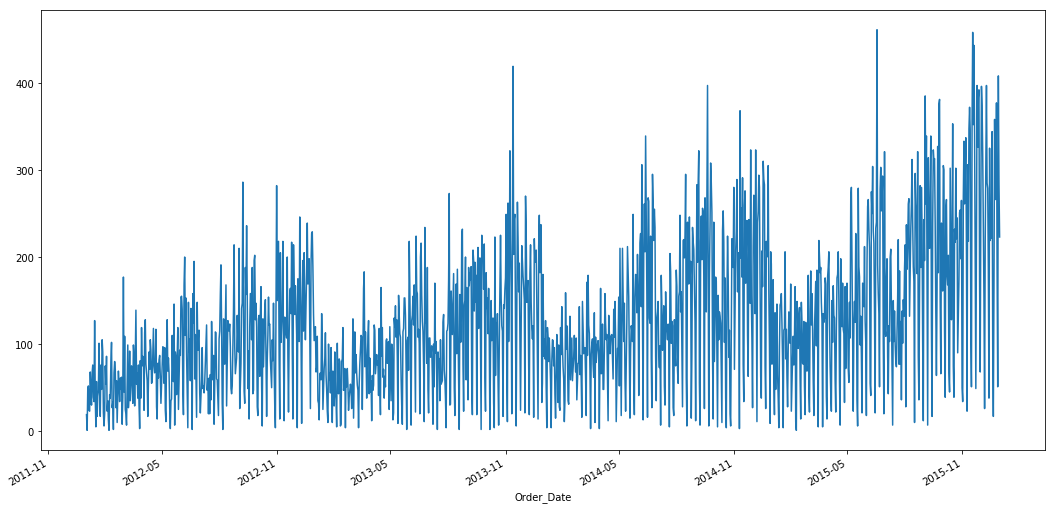

In [60]:
plt.rcParams['figure.figsize'] = 18, 9
ordersDI.groupby("Order_Date").Quantity.sum().plot()

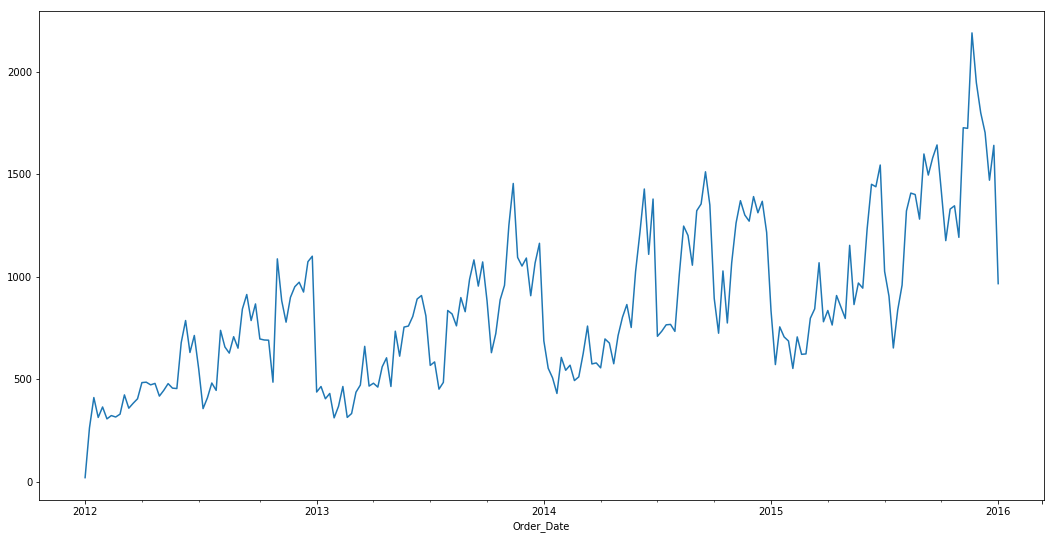

In [61]:
ordersDI.groupby(pd.Grouper(level = 'Order_Date', freq = "1W")).Quantity.sum().plot()

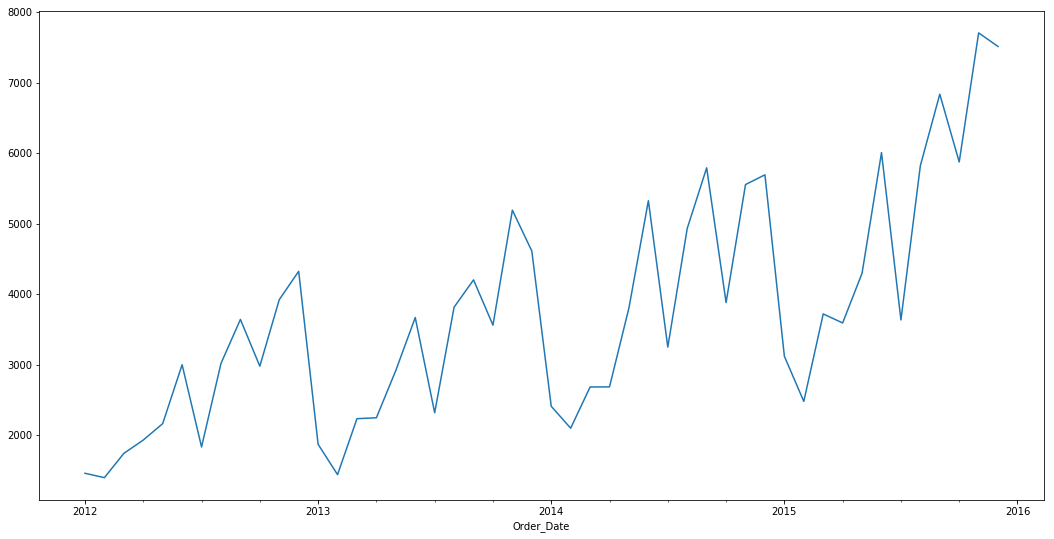

In [62]:
ordersDI.groupby(pd.Grouper(level = 'Order_Date', freq = "1M")).Quantity.sum().plot()

    2. Is the seasonal trend the same for different categories?

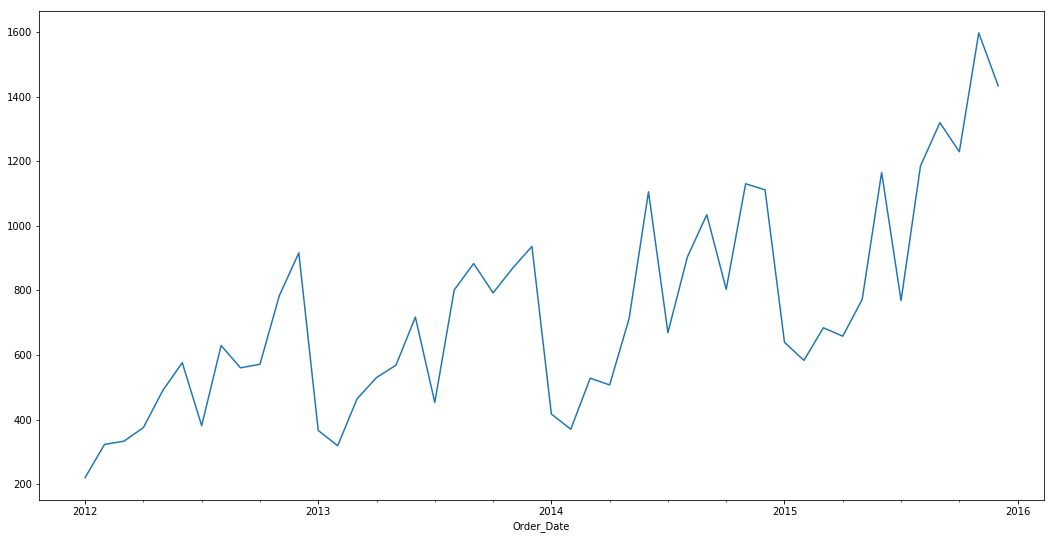

In [63]:
ordersDI[ordersDI.Category == "Technology"].groupby(pd.Grouper(level = 'Order_Date', freq = "1M")).Quantity.sum().plot()

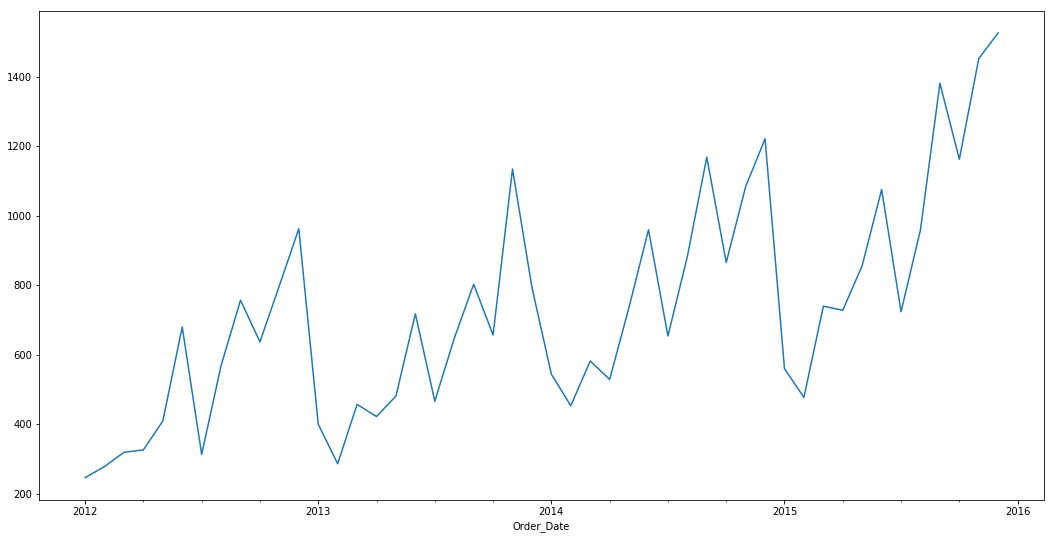

In [64]:
ordersDI[ordersDI.Category == "Furniture"].groupby(pd.Grouper(level = 'Order_Date', freq = "1M")).Quantity.sum().plot()

In [ ]:
ordersDI[ordersDI.Category == "Technology"].groupby(pd.Grouper(level = 'Order_Date', freq = "1M")).Quantity.sum().plot()

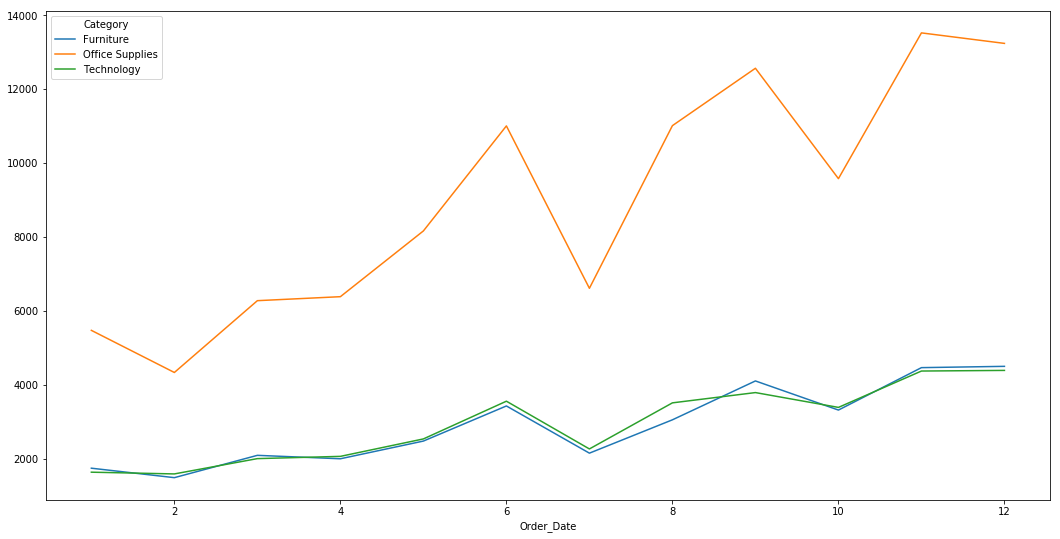

In [69]:
ordersDI.groupby([ordersDI.index.month, 'Category']).Quantity.sum().unstack(fill_value=0).plot()

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

	1. How much profit did we lose due to returns each year?

In [71]:
returns = pd.read_csv("~/Dropbox/nycdsa/Stats/MLLab/Machine_Learning_Lab/data/Returns.csv")

In [72]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [75]:
returns["Order_ID"] = returns["Order ID"]

In [86]:
detReturned = pd.merge(orders, returns[["Order_ID"]], on = "Order_ID")

In [93]:
detReturned = detReturned.set_index("Order_Date")

In [96]:
detReturned.head()

,Row_ID,Order_ID,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
Order_Date,,,,,,,,,,,,,,,,,,,,,
2012-12-16,30191,IN-2012-PB19210127-41259,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,FUR-TA-5060,Furniture,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.57,Critical
2012-12-16,30190,IN-2012-PB19210127-41259,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,FUR-BO-5762,Furniture,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.27,Critical
2012-12-16,30187,IN-2012-PB19210127-41259,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,FUR-TA-5065,Furniture,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.97,Critical
2012-12-16,30193,IN-2012-PB19210127-41259,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,FUR-CH-5454,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.92,Critical
2012-12-16,30189,IN-2012-PB19210127-41259,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,TEC-MA-5494,Technology,Machines,"Okidata Calculator, Red",148.32,3,0.0,68.22,25.48,Critical


In [95]:
detReturned.groupby(detReturned.index.year).Profit.sum()

Order_Date
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

	2. How many customer returned more than once? more than 5 times?

In [106]:
import numpy as np

In [107]:
## number of customers that returned more than once
np.sum(detReturned.groupby("Customer_ID").size() > 1)

547

In [108]:
## number of customers that returned more than 5 times
np.sum(detReturned.groupby("Customer_ID").size() > 5)

46

	3. Which regions are more likely to return orders?

In [113]:
ordersByRegion = orders.groupby("Region").size()

In [114]:
returnsByRegion = detReturned.groupby("Region").size()

In [118]:
(returnsByRegion / ordersByRegion).sort_values()

Region
Eastern Africa       0.024725
Central Africa       0.026439
Eastern Europe       0.027469
Central US           0.031855
Northern Europe      0.034483
Canada               0.039062
Western Europe       0.039606
North Africa         0.039906
Caribbean            0.040828
Western Africa       0.041096
Central Asia         0.041475
Southern Asia        0.041808
Central America      0.044160
Oceania              0.044164
Western Asia         0.044262
South America        0.044511
Southeastern Asia    0.044743
Eastern US           0.047051
Southern US          0.051235
Southern Africa      0.052301
Southern Europe      0.053005
Eastern Asia         0.055181
Western US           0.055261
dtype: float64

	4. Which categories (sub-categories) of products are more likely to be returned?

In [121]:
(detReturned.groupby("Category").size() / orders.groupby("Category").size()).sort_values()

Category
Office Supplies    0.043082
Furniture          0.043306
Technology         0.043881
dtype: float64

In [122]:
(detReturned.groupby("Sub_Category").size() / orders.groupby("Sub_Category").size()).sort_values()

Sub_Category
Appliances     0.033869
Fasteners      0.039216
Envelopes      0.041475
Storage        0.041989
Machines       0.042396
Supplies       0.042792
Furnishings    0.042803
Chairs         0.042807
Paper          0.042955
Bookcases      0.043136
Phones         0.043193
Binders        0.043768
Copiers        0.044534
Art            0.044613
Accessories    0.044878
Tables         0.047619
Labels         0.052672
dtype: float64